In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import class_weight
from sklearn.utils import shuffle
import csv
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
train_output_file = "/content/kiln_train_balanced_1_1.npz"
val_output_file = "/content/kiln_val_balanced_1_1.npz"
test_output_file = "/content/kiln_test_balanced_1_1.npz"

try:
    print(f"\nLoading BALANCED training data from {train_output_file}...")
    train_data = np.load(train_output_file)
    X_train = train_data['X_train']
    y_train = train_data['y_train']
    print("Training data loaded successfully.")
    print(f"  X_train shape: {X_train.shape}")
    print(f"  y_train shape: {y_train.shape}")
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    print(f"  Training class distribution: {dict(zip(unique_train, counts_train))}")
except FileNotFoundError:
    print(f"Error: Training data file not found at {train_output_file}")
    sys.exit(1)
except Exception as e:
    print(f"Error loading training data: {e}")
    sys.exit(1)

try:
    print(f"\nLoading validation data from {val_output_file}...")
    val_data = np.load(val_output_file)
    X_val = val_data['X_val']
    y_val = val_data['y_val']
    print("Validation data loaded successfully.")
    print(f"  X_val shape: {X_val.shape}")
    print(f"  y_val shape: {y_val.shape}")
    unique_val, counts_val = np.unique(y_val, return_counts=True)
    print(f"  Validation class distribution: {dict(zip(unique_val, counts_val))}")
except FileNotFoundError:
    print(f"Error: Validation data file not found at {val_output_file}")
    sys.exit(1)
except Exception as e:
    print(f"Error loading validation data: {e}")
    sys.exit(1)

try:
    print(f"\nLoading test data from {test_output_file}...")
    test_data = np.load(test_output_file)
    X_test = test_data['X_test']
    y_test = test_data['y_test']
    print("Test data loaded successfully.")
    print(f"  X_test shape: {X_test.shape}")
    print(f"  y_test shape: {y_test.shape}")
    # Optional: Verify imbalance
    unique_test, counts_test = np.unique(y_test, return_counts=True)
    print(f"  Test class distribution: {dict(zip(unique_test, counts_test))}")
except FileNotFoundError:
    print(f"Error: Test data file not found at {test_output_file}")
    sys.exit(1)
except Exception as e:
    print(f"Error loading test data: {e}")
    sys.exit(1)

print("\n--- All datasets loaded ---")


Loading BALANCED training data from /content/kiln_train_balanced_1_1.npz...
Training data loaded successfully.
  X_train shape: (1491, 64, 64, 3)
  y_train shape: (1491,)
  Training class distribution: {np.int32(0): np.int64(745), np.int32(1): np.int64(746)}

Loading validation data from /content/kiln_val_balanced_1_1.npz...
Validation data loaded successfully.
  X_val shape: (319, 64, 64, 3)
  y_val shape: (319,)
  Validation class distribution: {np.int32(0): np.int64(160), np.int32(1): np.int64(159)}

Loading test data from /content/kiln_test_balanced_1_1.npz...
Test data loaded successfully.
  X_test shape: (320, 64, 64, 3)
  y_test shape: (320,)
  Test class distribution: {np.int32(0): np.int64(160), np.int32(1): np.int64(160)}

--- All datasets loaded ---


In [ ]:
print("Generating synthetic data for demonstration...")
IMG_HEIGHT, IMG_WIDTH = 64, 64
NUM_TRAIN_SAMPLES = 500
NUM_VAL_SAMPLES = 100

# Generate random image-like data and binary labels
X_train = np.random.rand(NUM_TRAIN_SAMPLES, IMG_HEIGHT, IMG_WIDTH, 3).astype(np.float32)
y_train = np.random.randint(0, 2, size=(NUM_TRAIN_SAMPLES, 1)).astype(np.float32)

X_val = np.random.rand(NUM_VAL_SAMPLES, IMG_HEIGHT, IMG_WIDTH, 3).astype(np.float32)
y_val = np.random.randint(0, 2, size=(NUM_VAL_SAMPLES, 1)).astype(np.float32)



===== Starting Run 1: Phase 1 Only =====
--- Starting Experiment: VGG16_Demo_Phase1_Only ---
Configuration: Run Phase 2 = False
Training shape: (1491, 64, 64, 3), Validation shape: (319, 64, 64, 3)

Base VGG16 model loaded. Trainable status: False

Model defined:


Model: "VGG16_transfer_clf"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_flip_2       │ (None, 64, 64, 3) │          0 │ input_layer_7[0]… │
│ (RandomFlip)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_rotation_2   │ (None, 64, 64, 3) │          0 │ random_flip_2[0]… │
│ (RandomRotation)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_translation… │ (None, 64, 64, 3) │          0 │ random_rotation_… │
│ (RandomTranslation) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_6          │ (None, 64, 64)    │          0 │ random_translati… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_7          │ (None, 64, 64)    │          0 │ random_translati… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_8          │ (None, 64, 64)    │          0 │ random_translati… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_4 (Stack)     │ (None, 64, 64, 3) │          0 │ get_item_6[0][0], │
│                     │                   │            │ get_item_7[0][0], │
│                     │                   │            │ get_item_8[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 64, 64, 3) │          0 │ stack_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 2, 2, 512) │ 14,714,688 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │        513 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Model compiled for Phase 1 (lr=0.0001).

--- Starting Training Phase 1 ---
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4795 - auc: 0.4553 - loss: 2.2445 - precision: 0.4972 - recall: 0.6022
Epoch 1: val_auc improved from -inf to 0.43966, saving model to ./vgg16_training_runs/best_VGG16_Demo_Phase1_Only_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.4794 - auc: 0.4558 - loss: 2.2397 - precision: 0.4966 - recall: 0.6021 - val_accuracy: 0.4671 - val_auc: 0.4397 - val_loss: 1.4514 - val_precision: 0.4739 - val_recall: 0.6289
Epoch 2/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4581 - auc: 0.4418 - loss: 2.2074 - precision: 0.4754 - recall: 0.5511
Epoch 2: val_auc improved from 0.43966 to 0.45334, saving model to ./vgg16_training_runs/best_VGG16_Demo_Phase1_Only_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4590 - auc: 0.4436 - loss: 2.2018 - precision: 0.4754 - recall: 0.5524 - val_accuracy: 0.4765 - val_auc: 0.4533

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step

Classification Report (Validation Set):
              precision    recall  f1-score   support

     Class 0       0.75      0.79      0.77       160
     Class 1       0.77      0.74      0.75       159

    accuracy                           0.76       319
   macro avg       0.76      0.76      0.76       319
weighted avg       0.76      0.76      0.76       319

Confusion matrix plot saved to: ./vgg16_training_runs/confusion_matrix_VGG16_Demo_Phase1_Only.png


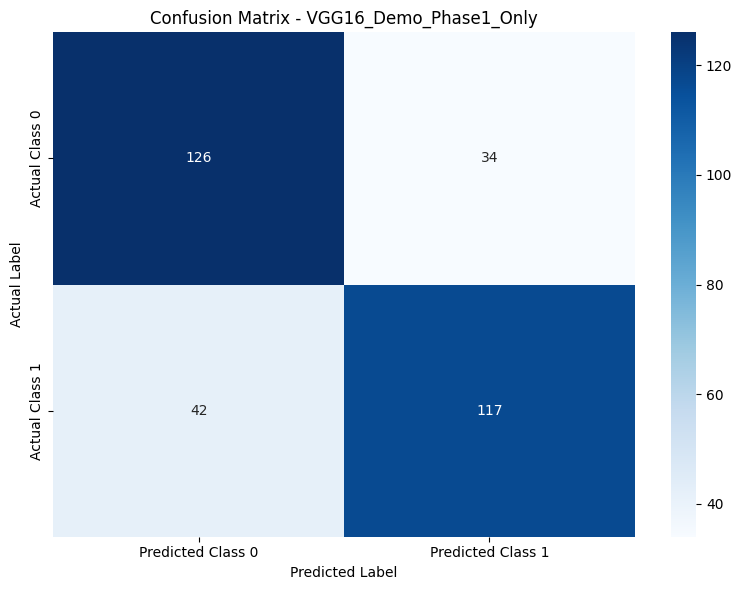


--- Experiment VGG16_Demo_Phase1_Only Finished ---

Run 1 (VGG16_Demo_Phase1_Only) finished.
Final Validation Results (Best Model from Phase 1): {'loss': 0.5078866481781006, 'accuracy': 0.7617554664611816, 'precision': 0.7748344540596008, 'recall': 0.7358490824699402, 'auc': 0.8461674451828003}


===== Starting Run 2: Phase 1 and Phase 2 =====
--- Starting Experiment: VGG16_Phase_1_and_2 ---
Configuration: Run Phase 2 = True
Training shape: (1491, 64, 64, 3), Validation shape: (319, 64, 64, 3)

Base VGG16 model loaded. Trainable status: False

Model defined:


Model: "VGG16_transfer_clf"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_flip_3       │ (None, 64, 64, 3) │          0 │ input_layer_9[0]… │
│ (RandomFlip)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_rotation_3   │ (None, 64, 64, 3) │          0 │ random_flip_3[0]… │
│ (RandomRotation)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_translation… │ (None, 64, 64, 3) │          0 │ random_rotation_… │
│ (RandomTranslation) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_9          │ (None, 64, 64)    │          0 │ random_translati… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_10         │ (None, 64, 64)    │          0 │ random_translati… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_11         │ (None, 64, 64)    │          0 │ random_translati… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_6 (Stack)     │ (None, 64, 64, 3) │          0 │ get_item_9[0][0], │
│                     │                   │            │ get_item_10[0][0… │
│                     │                   │            │ get_item_11[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 64, 64, 3) │          0 │ stack_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 2, 2, 512) │ 14,714,688 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │        513 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Model compiled for Phase 1 (lr=0.0001).

--- Starting Training Phase 1 ---
Epoch 1/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5317 - auc: 0.5587 - loss: 2.1751 - precision: 0.5708 - recall: 0.2690
Epoch 1: val_auc improved from -inf to 0.60476, saving model to ./vgg16_training_runs/best_VGG16_Phase_1_and_2_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5321 - auc: 0.5582 - loss: 2.1773 - precision: 0.5712 - recall: 0.2699 - val_accuracy: 0.5737 - val_auc: 0.6048 - val_loss: 1.4340 - val_precision: 0.7347 - val_recall: 0.2264
Epoch 2/100
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5388 - auc: 0.5477 - loss: 2.0731 - precision: 0.5530 - recall: 0.3204
Epoch 2: val_auc improved from 0.60476 to 0.61535, saving model to ./vgg16_training_runs/best_VGG16_Phase_1_and_2_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5371 - auc: 0.5451 - loss: 2.0860 - precision: 0.5514 - recall: 0.3192 - val_accuracy: 0.5956 - val_auc: 0.6153 - val

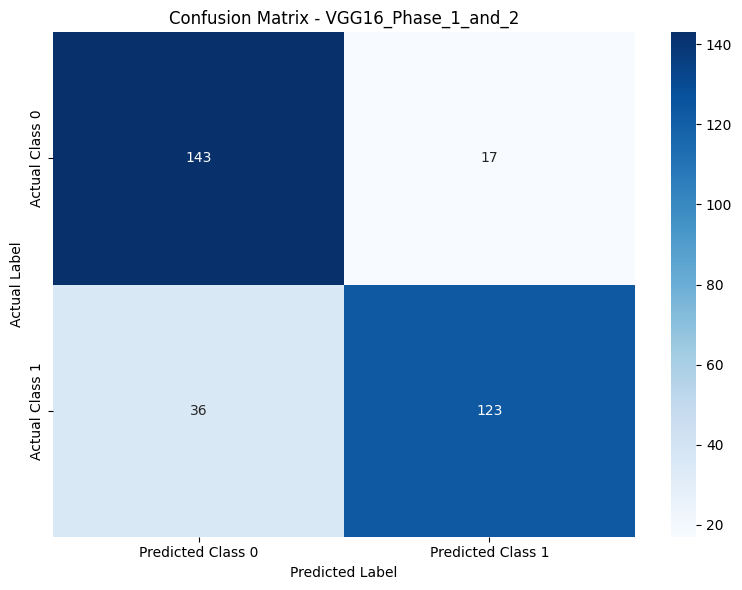


--- Experiment VGG16_Phase_1_and_2 Finished ---

Run 2 (VGG16_Phase_1_and_2) finished.
Final Validation Results (Best Model from Phase 1 & 2): {'loss': 0.37692520022392273, 'accuracy': 0.8338558077812195, 'precision': 0.8785714507102966, 'recall': 0.7735849022865295, 'auc': 0.9122249484062195}


In [ ]:
def train_vgg16_model(X_train, y_train, X_val, y_val,
                      run_phase2=True,
                      experiment_name="VGG16_Experiment",
                      save_dir="/content/"):
    """
    Trains a VGG16 model using transfer learning and optional fine-tuning.

    Generates a confusion matrix and classification report for the best
    performing model on the validation set at the end of training.

    Args:
        X_train: Training image data (NumPy array, e.g., shape (N, H, W, C)).
        y_train: Training labels (NumPy array, e.g., shape (N, 1) or (N,)).
        X_val: Validation image data (NumPy array).
        y_val: Validation labels (NumPy array).
        run_phase2 (bool): If True, performs both Phase 1 (transfer learning)
                           and Phase 2 (fine-tuning). If False, only performs
                           Phase 1. Defaults to True.
        experiment_name (str): Name for the experiment, used for saving the model
                               and output files. Defaults to "VGG16_Experiment".
        save_dir (str): Directory to save the best model checkpoint and the
                        confusion matrix plot. Defaults to "/content/".

    Returns:
        tuple: (best_model, combined_history, val_results_dict)
            - best_model: The loaded Keras model with the best weights found
                          during training (based on val_auc). Returns None if
                          model loading fails.
            - combined_history: A dictionary containing the training history
                              (loss, acc, etc.) for all completed epochs.
            - val_results_dict: A dictionary containing the evaluation metrics
                               of the best model on the validation set. Empty
                               if evaluation fails.
    """
    # Hyperparameters
    BASE_MODEL_NAME = "VGG16"
    FINE_TUNE_START_LAYER_NAME = "block5_conv1"
    INITIAL_LR_PHASE1 = 1e-4
    FINE_TUNE_LR = 1e-5
    OPTIMIZER_NAME = "Adam"
    BATCH_SIZE = 64
    EPOCHS_PHASE_1 = 100
    EPOCHS_PHASE_2 = 30
    PATIENCE_EARLY_STOPPING = 10

    print(f"--- Starting Experiment: {experiment_name} ---")
    print(f"Configuration: Run Phase 2 = {run_phase2}")
    print(f"Training shape: {X_train.shape}, Validation shape: {X_val.shape}")
    if y_train.ndim > 1 and y_train.shape[1] > 1:
         print("Warning: y_train seems to be one-hot encoded. Ensure loss is appropriate (e.g., CategoricalCrossentropy). This code uses BinaryCrossentropy.")
    if y_val.ndim > 1 and y_val.shape[1] > 1:
         print("Warning: y_val seems to be one-hot encoded. This code expects binary labels (0 or 1).")

    input_shape = X_train.shape[1:]

    os.makedirs(save_dir, exist_ok=True)
    model_checkpoint_path = os.path.join(save_dir, f"best_{experiment_name}_model.keras")

    #1. Load Pre-trained VGG16 Base
    base_model = tf.keras.applications.VGG16(
        weights='imagenet', input_shape=input_shape, include_top=False
    )

    # 2. Freeze the Base Model
    base_model.trainable = False
    print(f"\nBase {BASE_MODEL_NAME} model loaded. Trainable status: {base_model.trainable}")

    # 3. Define Augmentation and Classifier Head
    inputs = keras.Input(shape=input_shape)
    x = layers.RandomFlip("horizontal_and_vertical")(inputs)
    x = layers.RandomRotation(factor=0.14)(x)
    x = layers.RandomTranslation(height_factor=0.1, width_factor=0.1)(x)
    x = tf.keras.applications.vgg16.preprocess_input(x)
    base_model_output = base_model(x, training=False)
    # Classifier head
    pooled_output = layers.GlobalAveragePooling2D()(base_model_output)
    dropped_output = layers.Dropout(0.5)(pooled_output)
    outputs = layers.Dense(1, activation='sigmoid', name='output_layer')(dropped_output) # Binary classification

    model = keras.Model(inputs, outputs, name=f"{BASE_MODEL_NAME}_transfer_clf")
    print("\nModel defined:")
    model.summary()

    # 4. Compile for Phase 1
    metrics = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=INITIAL_LR_PHASE1),
        loss='binary_crossentropy', # Suitable for sigmoid output
        metrics=metrics
    )
    print(f"\nModel compiled for Phase 1 (lr={INITIAL_LR_PHASE1}).")


    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_auc',
        patience=PATIENCE_EARLY_STOPPING,
        mode='max',
        restore_best_weights=True,
        verbose=1
    )
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=model_checkpoint_path,
        monitor='val_auc',
        mode='max',
        save_best_only=True,
        verbose=1
    )

    # --- 5. Train Phase 1 ---
    print("\n--- Starting Training Phase 1 ---")
    history_phase1 = model.fit(
        X_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS_PHASE_1,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, model_checkpoint]
    )
    print("\n--- Finished Training Phase 1 ---")
    actual_epochs_phase1 = len(history_phase1.history['loss'])
    combined_history = {key: list(val) for key, val in history_phase1.history.items()}


    # 6. Fine-Tuning(Second Phase)
    if run_phase2:
        print("\n--- Preparing for Fine-Tuning (Phase 2) ---")
        print(f"Loading best weights from Phase 1 checkpoint: {model_checkpoint_path}")
        try:
            model.load_weights(model_checkpoint_path)
            print("Best weights from Phase 1 loaded into current model for fine-tuning.")
        except Exception as e:
            print(f"Warning: Could not load weights from {model_checkpoint_path}. "
                  f"Proceeding with weights from end of Phase 1 training (potentially restored by EarlyStopping). Error: {e}")

        base_model.trainable = True
        layer_found = False
        print(f"Attempting to unfreeze layers from {FINE_TUNE_START_LAYER_NAME} onwards...")
        for layer in base_model.layers:
            if layer.name == FINE_TUNE_START_LAYER_NAME:
                layer_found = True
            if not layer_found:
                 layer.trainable = False
            else:
                 layer.trainable = True

        if not layer_found:
            print(f"Warning: Fine-tuning start layer '{FINE_TUNE_START_LAYER_NAME}' not found. "
                  "All base model layers will be trainable for fine-tuning.")
        else:
             print(f"Base model layers unfrozen from {FINE_TUNE_START_LAYER_NAME} onwards.")

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=FINE_TUNE_LR),
            loss='binary_crossentropy',
            metrics=metrics
        )
        print(f"\nModel re-compiled for fine-tuning (lr={FINE_TUNE_LR}).")

        print("\n--- Starting Training Phase 2 (Fine-tuning) ---")
        if actual_epochs_phase1 < EPOCHS_PHASE_1 and actual_epochs_phase1 > 0 :
             print(f"Note: Phase 1 stopped early after {actual_epochs_phase1} epochs based on validation AUC.")


        total_epochs_target = EPOCHS_PHASE_1 + EPOCHS_PHASE_2


        early_stopping_p2 = tf.keras.callbacks.EarlyStopping(
            monitor='val_auc', patience=PATIENCE_EARLY_STOPPING, mode='max',
            restore_best_weights=True, verbose=1
        )
        model_checkpoint_p2 = tf.keras.callbacks.ModelCheckpoint(
            filepath=model_checkpoint_path,
            monitor='val_auc', mode='max',
            save_best_only=True, verbose=1
        )

        history_phase2 = model.fit(
            X_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=total_epochs_target,
            initial_epoch=actual_epochs_phase1,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping_p2, model_checkpoint_p2]
        )
        print("\n--- Finished Training Phase 2 ---")

        for key in combined_history.keys():
            if key in history_phase2.history:
                combined_history[key].extend(history_phase2.history[key])
    else:
        print("\n--- Skipping Phase 2 (Fine-tuning) as requested ---")

    print(f"\nLoading best overall model saved to {model_checkpoint_path} for final evaluation...")
    best_model = None
    try:
        best_model = keras.models.load_model(model_checkpoint_path)
        print("Best model loaded successfully.")
    except Exception as e:
        print(f"Error loading the best model from {model_checkpoint_path}. Cannot proceed with evaluation. Error: {e}")
        return None, combined_history, {}

    EXPECTED_METRIC_NAMES = ['loss', 'accuracy', 'precision', 'recall', 'auc']
    print("\nEvaluating best model on validation data (X_val)...")
    val_results_dict = {}
    try:
        val_results_list = best_model.evaluate(X_val, y_val, batch_size=BATCH_SIZE, verbose=0)
        print("\nBest Model Validation Metrics:")

        metric_names_from_model = best_model.metrics_names
        if len(metric_names_from_model) == len(val_results_list):
             for name, value in zip(metric_names_from_model, val_results_list):
                 print(f"  {name}: {value:.4f}")
                 clean_name = name.split(':')[-1]
                 val_results_dict[clean_name] = value
        elif len(EXPECTED_METRIC_NAMES) == len(val_results_list):
             print("Note: Using expected metric names as model names didn't match result length.")
             for name, value in zip(EXPECTED_METRIC_NAMES, val_results_list):
                print(f"  {name}: {value:.4f}")
                val_results_dict[name] = value
        else:
            print(f"Warning: Mismatch between metric names and evaluation results length.")
            print(f"  Model metrics names: {metric_names_from_model}")
            print(f"  Evaluation results: {val_results_list}")
            if len(val_results_list) > 0:
                val_results_dict['loss'] = val_results_list[0]
                print(f"  loss (assigned): {val_results_list[0]:.4f}")

    except NameError as ne:
         print(f"Error: Validation data (X_val, y_val) not defined or accessible for evaluation. {ne}")
         val_results_dict = {name: None for name in EXPECTED_METRIC_NAMES} # Init with None
    except Exception as e:
         print(f"An error occurred during final validation evaluation: {e}")
         val_results_dict = {name: None for name in EXPECTED_METRIC_NAMES} # Init with None


    # Generate and Plot Confusion Matrix
    print("\nGenerating Confusion Matrix & Classification Report for the best model on validation data...")
    try:
        y_pred_proba = best_model.predict(X_val, batch_size=BATCH_SIZE)
        y_pred = (y_pred_proba > 0.5).astype(int).flatten()

        if y_val.ndim > 1:
             if y_val.shape[1] == 1:
                 y_val_flat = y_val.flatten()
             else:
                  print(f"Warning: y_val has shape {y_val.shape}. Flattening for confusion matrix. Ensure this is the correct label format.")
                  y_val_flat = y_val.flatten()
        else:
            y_val_flat = y_val # Already 1D

        print("\nClassification Report (Validation Set):")
        target_names = ['Class 0', 'Class 1']
        try:
             print(classification_report(y_val_flat, y_pred, target_names=target_names))
        except ValueError as ve:
             print(f"Could not generate classification report. Error: {ve}")
             print("This might happen if only one class is present in y_true or y_pred.")
             print("Unique true labels:", np.unique(y_val_flat))
             print("Unique predicted labels:", np.unique(y_pred))


        cm = confusion_matrix(y_val_flat, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f'Predicted {target_names[0]}', f'Predicted {target_names[1]}'],
                    yticklabels=[f'Actual {target_names[0]}', f'Actual {target_names[1]}'])
        plt.title(f'Confusion Matrix - {experiment_name}')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

        cm_save_path = os.path.join(save_dir, f"confusion_matrix_{experiment_name}.png")
        try:
            plt.savefig(cm_save_path)
            print(f"Confusion matrix plot saved to: {cm_save_path}")
        except Exception as e:
            print(f"Error saving confusion matrix plot: {e}")

        plt.show()

    except NameError as ne:
        print(f"Error: Could not generate confusion matrix. Data (X_val, y_val) or model not available? {ne}")
    except Exception as e:
        print(f"An error occurred during confusion matrix generation: {e}")


    print(f"\n--- Experiment {experiment_name} Finished ---")
    return best_model, combined_history, val_results_dict


RESULTS_DIR = "./vgg16_training_runs"

# Run 1: Phase 1 Only
print("\n\n===== Starting Run 1: Phase 1 Only =====")
exp1_name = "VGG16_Phase1_Only"
model_p1, history_p1, results_p1 = train_vgg16_model(
    X_train, y_train, X_val, y_val,
    run_phase2=False,
    experiment_name=exp1_name,
    save_dir=RESULTS_DIR
)

if model_p1:
    print(f"\nRun 1 ({exp1_name}) finished.")
    print("Final Validation Results (Best Model from Phase 1):", results_p1)
else:
    print(f"\nRun 1 ({exp1_name}) potentially failed (check logs).")


#Run 2: Phase 1 + Phase 2
print("\n\n===== Starting Run 2: Phase 1 and Phase 2 =====")
exp2_name = "VGG16_Phase_1_and_2"
model_p1p2, history_p1p2, results_p1p2 = train_vgg16_model(
    X_train, y_train, X_val, y_val,
    run_phase2=True,
    experiment_name=exp2_name,
    save_dir=RESULTS_DIR
)

if model_p1p2:
    print(f"\nRun 2 ({exp2_name}) finished.")
    print("Final Validation Results (Best Model from Phase 1 & 2):", results_p1p2)

else:
     print(f"\nRun 2 ({exp2_name}) potentially failed (check logs).")